In [1]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper

# Creating Tools
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=1000)
arxiv =  ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Search for academic papers on arXiv.org")

api_wrapper_wikipedia = WikipediaAPIWrapper(top_k_results=2, doc_content_chars_max=600)
wikipedia = WikipediaQueryRun(api_wrapper=api_wrapper_wikipedia, description="Search for articles on Wikipedia.org")

print(arxiv.invoke("Quantum Computing"))
print(wikipedia.invoke("Quantum Computing"))

Published: 2022-08-01
Title: The Rise of Quantum Internet Computing
Authors: Seng W. Loke
Summary: This article highlights quantum Internet computing as referring to
distributed quantum computing over the quantum Internet, analogous to
(classical) Internet computing involving (classical) distributed computing over
the (classical) Internet. Relevant to quantum Internet computing would be areas
of study such as quantum protocols for distributed nodes using quantum
information for computations, quantum cloud computing, delegated verifiable
blind or private computing, non-local gates, and distributed quantum
applications, over Internet-scale distances.

Published: 2000-03-31
Title: Unconventional Quantum Computing Devices
Authors: Seth Lloyd
Summary: This paper investigates a variety of unconventional quantum computation
devices, including fermionic quantum computers and computers that exploit
nonlinear quantum mechanics. It is shown that unconventional quantum computing
devices can in pri

In [2]:
from langchain_community.tools.tavily_search import TavilySearchResults
from dotenv import load_dotenv
load_dotenv()
import os

os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

tavily = TavilySearchResults()

print(tavily.invoke("provide me the recent AI news"))

/tmp/ipykernel_228286/1365296032.py:9: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


[{'title': 'Artificial Intelligence News - ScienceDaily', 'url': 'https://www.sciencedaily.com/news/computers_math/artificial_intelligence/', 'content': '![ScienceDaily](/images/sd-logo.png)\n\n# Artificial Intelligence News\n\n## Top Headlines\n\n## Latest Headlines\n\n## Earlier Headlines\n\n### Thursday, May 15, 2025\n\n### Wednesday, May 14, 2025\n\n### Tuesday, May 13, 2025\n\n### Monday, May 12, 2025\n\n### Thursday, May 8, 2025\n\n### Wednesday, May 7, 2025\n\n### Tuesday, May 6, 2025\n\n### Monday, May 5, 2025\n\n### Thursday, May 1, 2025\n\n### Wednesday, April 30, 2025\n\n### Monday, April 28, 2025\n\n### Friday, April 25, 2025\n\n### Thursday, April 24, 2025 [...] ### Wednesday, April 23, 2025\n\n### Tuesday, April 22, 2025\n\n### Monday, April 21, 2025\n\n### Wednesday, April 16, 2025\n\n### Tuesday, April 15, 2025\n\n### Monday, April 14, 2025\n\n### Thursday, April 10, 2025\n\n### Wednesday, April 9, 2025\n\n### Tuesday, April 8, 2025\n\n### Monday, April 7, 2025\n\n### F

In [3]:
tools = [arxiv, wikipedia, tavily]

In [4]:
from langchain_groq import ChatGroq

llm = ChatGroq(model = "qwen-qwq-32b")

In [5]:
llm.invoke("latest llm model of qwen")

AIMessage(content="\n<think>\nOkay, the user is asking about the latest LLM model of Qwen. Let me start by recalling what I know about Qwen. Qwen is a series of large language models developed by Alibaba Cloud. The latest version as of my last update is Qwen2.\n\nFirst, I should confirm the current version. Wait, when was the last major update? I remember there was Qwen1, then Qwen1.5, Qwen2, and Qwen2.5. But I need to be precise. Let me think. The user might be looking for the most recent release, so maybe Qwen2.5 is the latest. But I should check if there's a more recent one beyond that.\n\nAlso, there's Qwen2.5 and Qwen2.5-Max. The Max version has a larger context length, right? So perhaps the latest is Qwen2.5-Max. But I should structure the answer by listing the versions in order, mentioning their features and improvements over previous versions.\n\nWait, the user might also be interested in the capabilities. I should highlight the improvements in reasoning, code generation, and m

In [6]:
llm_with_tools = llm.bind_tools(tools=tools)

In [7]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages 

In [8]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage] , add_messages] # add_messages will append all the messages to the messages varaible and return in the typed dict format, it will not over write 
    

In [9]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START , END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [10]:
# Make sure cell 7 (State definition) is executed before running this cell

def tool_calling_llm(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

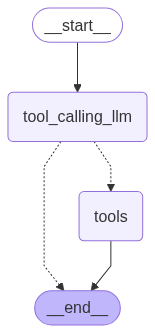

In [11]:

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition)
builder.add_edge("tools", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
messages = graph.invoke({"messages":"1760.0354"})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

1760.0354
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (6ja7vxg79)
 Call ID: 6ja7vxg79
  Args:
    query: 1760.0354
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Offline Learning for Sequence-Based Selection Hyper-Heuristics", "url": "https://search.proquest.com/openview/c8f25dacb34259b9a57e90baa02be1d4/1?pq-origsite=gscholar&cbl=51922&diss=y", "content": "> Prob. SSHH SD T-SSHH SD\n> TRN 357.4068 16.9400 361.0980 18.6944\n> TLN 87.2512 2.6345 87.9132 2.4008\n> BAK 179.0267 0.9965 179.2223 1.4257\n> NYT 8116.0158 536.2183 8169.6525 645.3373\n> BLA 22.2911 1.2971 22.5268 2.4840\n> HAN 1286.6305 37.4569 1294.9970 42.7782\n> GOY 33.3999 0.1606 33.3900 0.0628\n> FOS 4.2449 0.6641 4.4674 0.9202\n> PES 401.5132 31.3177 409.5692 50.8569\n> MOD 555.0569 27.6

In [13]:
messages = graph.invoke({"messages":"Hi, I am deepak"})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

Hi, I am deepak
================================== Ai Message ==================================

Hello Deepak! Nice to meet you. How can I assist you today? Feel free to ask about anything—whether you need information, help with a task, or just want to chat!
